In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
import numpy as np

In [3]:
from nltk.corpus import stopwords

In [4]:
from nltk.stem import PorterStemmer

In [5]:
from nltk.stem import WordNetLemmatizer

In [6]:
category=pd.read_csv('C:\\Users\\lenovo\\Downloads\\Assignment for ML engineer - Categorise.csv')

In [7]:
category.head()

,Statement,Keywords
0,:dizzy::sunflower::herb: You might not see it ...,amazondotin amazonfashion amazoninfluencer bek...
1,Yes You heard it right... You can have paratha...,awifesperspective
2,Those were the days.... No Corona No masks.......,awifesperspective
3,Agree??It happens to me every week... What abo...,awifesperspective
4,:white_medium_star::upside-down_face::white_me...,bowtieandlipsticks covid19 gocoronago healthti...


In [8]:
city=pd.read_csv('C:\\Users\\lenovo\\Downloads\\Assignment for ML engineer - City data.csv')

In [9]:
city.head()

,Primary city,Secondary city
0,"New Delhi,DL,India",NCR
1,"Mumbai, MH, India",Mumbai
2,"Mumbai,MH,India",Ayatana Coorg
3,"New Delhi,DL,India",Chandni Chowk
4,"Vadodara, GJ, India","Vadodara, Gujarat, India"


In [10]:
comment=pd.read_csv('C:\\Users\\lenovo\\Downloads\\Assignment for ML engineer - Comment Analysis.csv')

In [11]:
comment.head()

,Comment
0,OMG i never Belive that i will be able to loss...
1,@plumbodylovin great giveaway lol... I was ski...
2,I dont believe in body shaming at all\t\t\t\t\...
3,Eve i had faced bodyshaming but I don't care n...
4,Same i was under wait till my school days and ...


In [12]:
comparative=pd.read_csv('C:\\Users\\lenovo\\Downloads\\Assignment for ML engineer - Comparitive analysis.csv')

In [13]:
comparative.head()

,user id,Followers,Last updated,media,engagement,Media frequency
0,1894,24529,2019-08-14 2:51:11,736,5,NaN
1,1894,24541,2019-07-30 20:11:46,734,3,NaN
2,1894,24531,2019-08-01 13:47:35,734,3,NaN
3,1894,24534,2019-08-06 13:12:17,735,4,NaN
4,1894,24543,2019-08-08 12:54:30,735,4,NaN


In [14]:
category.isnull().sum()

Statement    0
Keywords     2
dtype: int64

In [15]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
Statement    103 non-null object
Keywords     101 non-null object
dtypes: object(2)
memory usage: 1.7+ KB


In [16]:
category['Statement']

0      :dizzy::sunflower::herb: You might not see it ...
1      Yes You heard it right... You can have paratha...
2      Those were the days.... No Corona No masks.......
3      Agree??It happens to me every week... What abo...
4      :white_medium_star::upside-down_face::white_me...
                             ...                        
98     Muharram, 2019, New Delhi..#spi_silhouettes .....
99      , 2019...IG:- @travelwithdanish #travelwithda...
100    Peaceful & Solitude- The Golden Hour....@trave...
101    Welcome Ganesha :smiling_face_with_heart-eyes:...
102    Happy World Photography Day :victory_hand::red...
Name: Statement, Length: 103, dtype: object

In [31]:
comparative.isnull().sum()

user id              0
Followers            0
Last updated         0
media                0
engagement           0
Media frequency    217
dtype: int64

In [32]:
comparative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
user id            217 non-null int64
Followers          217 non-null int64
Last updated       217 non-null object
media              217 non-null int64
engagement         217 non-null int64
Media frequency    0 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 10.3+ KB


In [34]:
comparative.nunique()

user id              4
Followers          131
Last updated       217
media               78
engagement          25
Media frequency      0
dtype: int64

# Most active User 

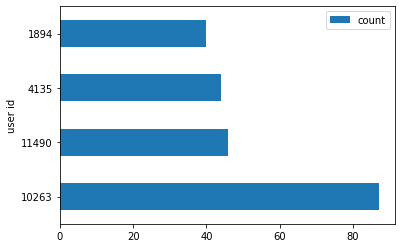

In [56]:
comparative['user id'].value_counts().reset_index().rename(columns={'index':'user id','user id':'count'}).sort_values(by='count',ascending=False).plot(kind='barh',x='user id',y='count')

In [65]:
#user id 10263 is the most active person among all

# User id with most media

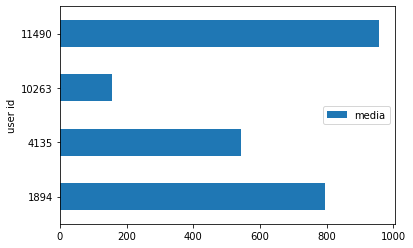

In [50]:
comparative.groupby('user id')['media'].mean().reset_index().plot(kind='barh',x='user id', y='media')

In [66]:
#user id 11490 , 1894 has most media

In [49]:
comparative['user id'].unique()

array([ 1894,  4135, 10263, 11490], dtype=int64)

In [60]:
comparative.groupby('user id')['engagement'].mean().reset_index()

,user id,engagement
0,1894,13.700000
1,4135,5.909091
2,10263,27.551724
3,11490,3.434783


# User id with most Engagement

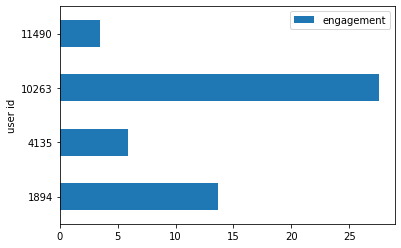

In [61]:
comparative.groupby('user id')['engagement'].mean().reset_index().plot(kind='barh',x='user id', y='engagement')

In [67]:
#user id 10263 has the highest engagement

In [ ]:
# type(comparative['Last updated'][0])

# Creating more features from date feature

In [64]:
comparative['Last updated']=pd.to_datetime(comparative['Last updated'])

In [78]:
comparative['date']=[i.date() for i in comparative['Last updated']]

In [80]:
comparative['dayofweek']=[i.dayofweek for i in comparative['Last updated']]

In [87]:
comparative['isweekend']=np.where(comparative['dayofweek'].isin([5,6]), 1, 0)

In [125]:
comparative.head()

,user id,Followers,Last updated,media,engagement,Media frequency,date,dayofweek,isweekend,day,hour,stageofday,year
0,1894,24529,2019-08-14 02:51:11,736,5,NaN,2019-08-14,2,0,14,2,post midnight,2019
1,1894,24541,2019-07-30 20:11:46,734,3,NaN,2019-07-30,1,0,30,20,afer evening before midnight,2019
2,1894,24531,2019-08-01 13:47:35,734,3,NaN,2019-08-01,3,0,1,13,before evening after noon,2019
3,1894,24534,2019-08-06 13:12:17,735,4,NaN,2019-08-06,1,0,6,13,before evening after noon,2019
4,1894,24543,2019-08-08 12:54:30,735,4,NaN,2019-08-08,3,0,8,12,before evening after noon,2019


In [91]:
comparative['day']=comparative['Last updated'].dt.day

In [93]:
comparative['hour']=comparative['Last updated'].dt.hour

In [123]:
comparative['stageofday']=comparative['hour'].apply(foo)

In [124]:
comparative['year']=comparative['Last updated'].dt.year

# Different stages of day

In [96]:
def foo(x):
    if x in range(0,7):
        return 'post midnight'
    elif x in range(7,12):
        return ' morning before noon'
    elif x in range(12,19):
        return 'before evening after noon'
    elif x in range(19,25):
        return 'afer evening before midnight'
    else:
        return x

# time of day when people are most active

In [101]:
comparative.groupby('stageofday').engagement.mean()

stageofday
 morning before noon            23.032787
afer evening before midnight    10.421053
before evening after noon       15.789474
post midnight                    9.180328
Name: engagement, dtype: float64

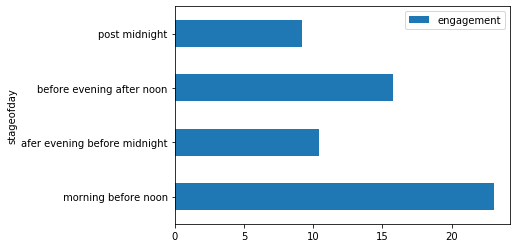

In [103]:
comparative.groupby('stageofday').engagement.mean().reset_index().plot(kind='barh',x='stageofday',y='engagement')

In [68]:
#users are most active in the morning and in mid day

# Day of week when users are most active

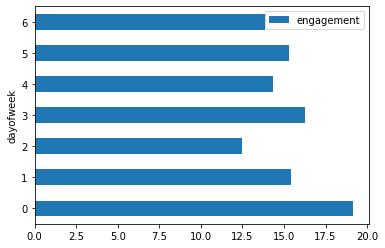

In [104]:
comparative.groupby('dayofweek').engagement.mean().reset_index().plot(kind='barh',x='dayofweek',y='engagement')

In [69]:
#users are equally active everyday

# users engagement on weekends

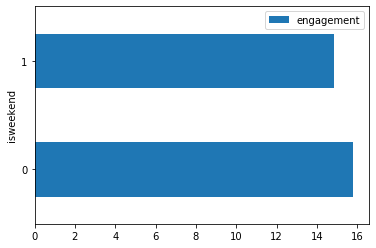

In [105]:
comparative.groupby('isweekend').engagement.mean().reset_index().plot(kind='barh',x='isweekend',y='engagement')

# Followers of every user id , change in no. of followers everyday

In [108]:
followers={i:comparative[comparative['user id']==i]['Followers']   for i in comparative['user id'].unique()}

# in a week change in followers of user id 1894

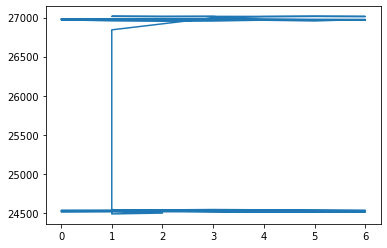

In [119]:
plt.plot(comparative[comparative['user id']==1894]['dayofweek'], followers[1894])

In [128]:
comparative['user id'].unique()

array([ 1894,  4135, 10263, 11490], dtype=int64)

In [129]:
comparative['year'].unique()

array([2019, 2020], dtype=int64)

# Change in followers in a year of user id 4135

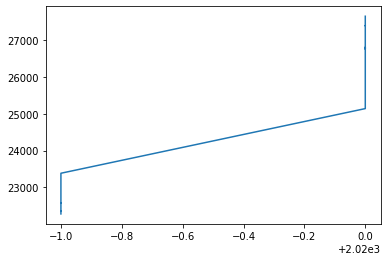

In [127]:
plt.plot(comparative[comparative['user id']==4135]['year'], followers[4135])

# Change of followers in a month

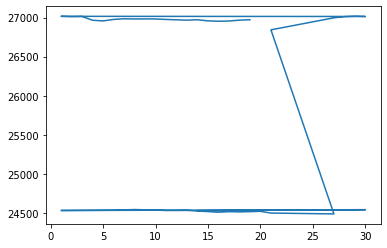

In [122]:
plt.plot(comparative[comparative['user id']==1894]['day'], followers[1894])

In [130]:
category.head()

,Statement,Keywords
0,:dizzy::sunflower::herb: You might not see it ...,amazondotin amazonfashion amazoninfluencer bek...
1,Yes You heard it right... You can have paratha...,awifesperspective
2,Those were the days.... No Corona No masks.......,awifesperspective
3,Agree??It happens to me every week... What abo...,awifesperspective
4,:white_medium_star::upside-down_face::white_me...,bowtieandlipsticks covid19 gocoronago healthti...


In [132]:
category['Keywords'].nunique()

96

In [133]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
Statement    103 non-null object
Keywords     101 non-null object
dtypes: object(2)
memory usage: 1.7+ KB


In [135]:
category.isnull().sum()

Statement    0
Keywords     2
dtype: int64

In [18]:
kc=PorterStemmer()

# Removing stopwords and Stemming

In [19]:
corpus=[]
for i in range(len(category['Statement'])):
    helo=re.sub('[^a-zA-Z]',' ',category['Statement'][i])
    helo=helo.lower()
    helo=helo.split()
    helo=[kc.stem(k) for k in helo if k not in set(stopwords.words('english'))]
    helo=' '.join(helo)
    corpus.append(helo)
    
    
    

In [20]:
corpus


['dizzi sunflow herb might see gonna fuck smile face sunglass founditonamazon amazonfashion amazondotin amazoninfluenc follow abdul zubarti camera follow abdul zubarti camera dont forget doubl tap like comment thought thought balloon share friend virgo follow abdul zubarti red heart amaz post white heavi check mark rainbow trendingfashion fashionphotoshoot explorepagereadi indianinfluenc fashionmodel bekindnessgod iblradi lifehotoaisihi',
 'ye heard right paratha sandwich green heart skip fri food though bodi digest power strongest time awifesperspect',
 'day corona mask add tone favourit color dress lot fun awifesperspect',
 'agre happen everi week awifesperspect photooftheday call funni style flower design yellow red heart happi beauti textpost beauti makeup brokenheart picoftheday flower pretti black handmad hair pink funnytext photographi',
 'white medium star upsid face white medium star dizzi love letter tip take care kid season changekeep babi safe season chang import that tend 

In [21]:
from textblob import TextBlob

In [22]:
def foo1(x):
    return TextBlob(x).sentiment.polarity

In [23]:
category['polarity']=pd.Series(corpus).apply(foo1)

In [24]:
def foo2(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
        
    

In [25]:
category['polarity']=category['polarity'].apply(foo2)

In [26]:
category.head()

,Statement,Keywords,polarity
0,:dizzy::sunflower::herb: You might not see it ...,amazondotin amazonfashion amazoninfluencer bek...,negative
1,Yes You heard it right... You can have paratha...,awifesperspective,positive
2,Those were the days.... No Corona No masks.......,awifesperspective,positive
3,Agree??It happens to me every week... What abo...,awifesperspective,negative
4,:white_medium_star::upside-down_face::white_me...,bowtieandlipsticks covid19 gocoronago healthti...,positive


# Sentiment analysis of statements


In [32]:
groups={i:category[category['polarity']==i]['Keywords']  for i in category['polarity'].unique()}

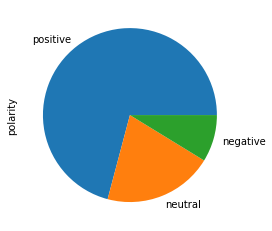

In [40]:
category.polarity.value_counts().plot(kind='pie')

In [72]:
category.polarity.value_counts(normalize=True)

positive    0.708738
neutral     0.203883
negative    0.087379
Name: polarity, dtype: float64

In [73]:
#statements are mostly positive

In [41]:
corpus1=[]
for i in range(len(comment['Comment'])):
    helo=re.sub('[^a-zA-Z]',' ',comment['Comment'][i])
    helo=helo.lower()
    helo=helo.split()
    helo=[kc.stem(k) for k in helo if k not in set(stopwords.words('english'))]
    helo=' '.join(helo)
    corpus1.append(helo)
    
    

# sentiment analysis of comments

In [43]:
corpus1

['omg never beliv abl loss weight tri sever method go gym mani thing help thank dr wisdom herb made possibl abl loss weight use herb root ship drink one month weight return normal happiest creation earth thank dr wisdom herb god bless forev love',
 'plumbodylovin great giveaway lol skinni back school cant even begin tell mani taunt use receiv khaati piti nai hai kya kuch like bruhhh annoy',
 'dont believ bodi shame',
 'eve face bodysham care plumgood',
 'wait till school day skinni bad phase',
 'check plumbodylovin never bodi shame victim color',
 'hv hving',
 'alway find syrup cold cough tablet cofsil india bag',
 'need weather',
 'realli care get cough hell throat definit check',
 'wat want father cofsil india',
 'drool ovenstori pizza',
 'pizza long',
 'miss hving chees burst pizza',
 'need pizza ovenstroy',
 'oh wow feel hungri',
 'girl look bomb af',
 'omg want paryushan though',
 'await video',
 'word pretti worthless without',
 'letecom grassisgreeenish cocreateyourjourney iinst

In [44]:
comment['polarity']=pd.Series(corpus1).apply(foo1)

In [45]:
def foo2(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
        
    

In [46]:
comment['polarity']=comment['polarity'].apply(foo2)

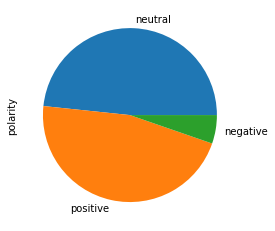

In [47]:
comment.polarity.value_counts().plot(kind='pie')

In [70]:
#mostly comments are positive and neutral

In [71]:
comment.polarity.value_counts(normalize=True)

neutral     0.483444
positive    0.463576
negative    0.052980
Name: polarity, dtype: float64